In [ ]:
%pip install scikit-learn
%pip install -U langchain-huggingface


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from langchain_huggingface import HuggingFaceEmbeddings


In [2]:
# Step 1: Define the embedding model
# Using a HuggingFace model for embeddings in LangChain
embed_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")


In [3]:
# Generate an embedding for a single sentence
single_embedding = embed_model.embed_query("Embeddings represent text as numerical vectors in AI systems.")
print(single_embedding)
print(f"Single embedding length: {len(single_embedding)}")

[-0.012320948764681816, -0.03862697258591652, -0.008750556036829948, -0.029922960326075554, 0.020843038335442543, 0.024390870705246925, 0.0025231854524463415, 0.02398170344531536, 0.04169024899601936, -0.04870452731847763, -0.027678703889250755, 0.017041441053152084, 0.09081068634986877, 0.027930796146392822, -0.0720968246459961, 0.02237073704600334, 0.05846643075346947, 0.03360384702682495, -0.04406455159187317, -0.028049806132912636, 0.004680316895246506, 0.04793339595198631, -0.021642690524458885, -0.07187558710575104, 0.052199672907590866, 0.08530563116073608, -0.03812336549162865, 0.0057165855541825294, 0.03401390463113785, 0.025885529816150665, 0.02063407190144062, -0.016243096441030502, 0.02714165300130844, 0.03702506050467491, -0.06500254571437836, 0.03004288673400879, -0.041986435651779175, -0.010220046155154705, -0.056066498160362244, 0.03828473016619682, 0.047523438930511475, 0.011876914650201797, 0.06172051653265953, 0.04174937680363655, 0.10229756683111191, 0.0289267729967

In [4]:
print(embed_model.embed_query("Embeddings represent text as numerical vectors in AI systems."))


[-0.012320948764681816, -0.03862697258591652, -0.008750556036829948, -0.029922960326075554, 0.020843038335442543, 0.024390870705246925, 0.0025231854524463415, 0.02398170344531536, 0.04169024899601936, -0.04870452731847763, -0.027678703889250755, 0.017041441053152084, 0.09081068634986877, 0.027930796146392822, -0.0720968246459961, 0.02237073704600334, 0.05846643075346947, 0.03360384702682495, -0.04406455159187317, -0.028049806132912636, 0.004680316895246506, 0.04793339595198631, -0.021642690524458885, -0.07187558710575104, 0.052199672907590866, 0.08530563116073608, -0.03812336549162865, 0.0057165855541825294, 0.03401390463113785, 0.025885529816150665, 0.02063407190144062, -0.016243096441030502, 0.02714165300130844, 0.03702506050467491, -0.06500254571437836, 0.03004288673400879, -0.041986435651779175, -0.010220046155154705, -0.056066498160362244, 0.03828473016619682, 0.047523438930511475, 0.011876914650201797, 0.06172051653265953, 0.04174937680363655, 0.10229756683111191, 0.0289267729967

In [6]:
# Step 2: Define the statements
statements = [
    "The cat is on the mat.",                     # Set 1 - Stmt 1
    "The sun rises in the east.",                 # Unrelated - Stmt 2
    "The feline rests on the carpet.",            # Set 1 - Stmt 3
    "Artificial Intelligence is fascinating.",    # Set 2 - Stmt 4
    "Machine learning drives AI advancements.",   # Set 2 - Stmt 5
    "Birds fly in the sky.",                      # Unrelated - Stmt 6
    "Deep learning is a subset of AI.",           # Set 2 - Stmt 7
    "Cat and Cow are domestic animals",           # Set 1 - Stmt 8
    "Equity, mutual funds and stocks are various options to invest", # Set 3 - Stmt 9
    "Gold can be used as hedge towards the investement", # Set 3 - Stmt 10
    "Nifty and Sensex are major index in India", # Set 3 - Stmt 11
    "Nasdaq, Dow and S&P 100 are major index in India", # Set 3 - Stmt 12
]

In [7]:
# Step 3: Generate embeddings
embeddings = [embed_model.embed_query(statement) for statement in statements]
print(f"Number of embeddings generated: {len(embeddings)}")

Number of embeddings generated: 12


In [8]:

# Step 4: Calculate cosine similarity
similarity_matrix = cosine_similarity(embeddings)

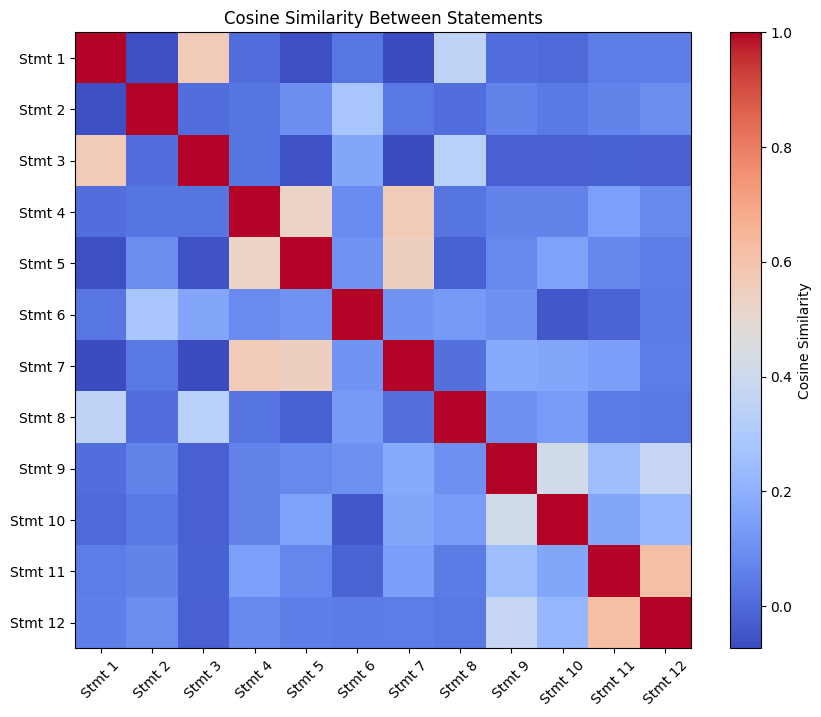

In [9]:
# Step 5: Visualize the similarity matrix
plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.xticks(range(len(statements)), [f"Stmt {i+1}" for i in range(len(statements))], rotation=45)
plt.yticks(range(len(statements)), [f"Stmt {i+1}" for i in range(len(statements))])
plt.title("Cosine Similarity Between Statements")
plt.show()

In [10]:
# Step 6: Analyze relationships in 2D using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

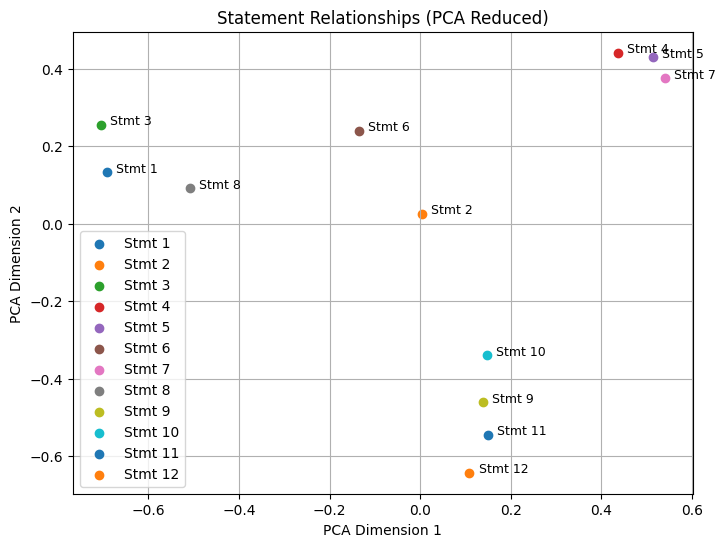

In [11]:
# Scatter plot to visualize relationships
plt.figure(figsize=(8, 6))
for i, (x, y) in enumerate(reduced_embeddings):
    plt.scatter(x, y, label=f"Stmt {i+1}")
    plt.text(x + 0.02, y, f"Stmt {i+1}", fontsize=9)

plt.title("Statement Relationships (PCA Reduced)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend()
plt.grid()
plt.show()